## 1. Import Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neural_network import MLPClassifier

In [3]:
# Import Data
df_scaled = pd.read_csv('/Users/samabrams/Data Analysis Projects/ClimateWins ML Project/02 Data/Prepared Data/weather_scaled.csv')

df_answers = pd.read_csv('/Users/samabrams/Data Analysis Projects/ClimateWins ML Project/02 Data/Original Data/Answers-Weather_Prediction_Pleasant_Weather.csv')

In [4]:
print(df_scaled.shape)
print(df_answers.shape)

(22950, 171)
(22950, 16)


In [5]:
# Select only the mean, min, and max temperature variables (excluding Gdansk, Roma,Tours)

df_temps_mean = df_scaled[['BASEL_temp_mean',
'BELGRADE_temp_mean',
'BUDAPEST_temp_mean',
'DEBILT_temp_mean',
'DUSSELDORF_temp_mean',
'HEATHROW_temp_mean',
'KASSEL_temp_mean',
'LJUBLJANA_temp_mean',
'MAASTRICHT_temp_mean',
'MADRID_temp_mean',
'MUNCHENB_temp_mean',
'OSLO_temp_mean',
'SONNBLICK_temp_mean',
'STOCKHOLM_temp_mean',
'VALENTIA_temp_mean']].copy()

In [6]:
df_temps_mean

,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,VALENTIA_temp_mean
0,-0.528623,-1.016876,-1.099163,-0.114356,-0.105836,-0.106469,-0.182904,-1.370824,-0.097084,-0.988280,-0.265742,-0.186575,-0.124331,-0.391072,-0.668215
1,-0.582946,-1.107669,-1.110927,-0.367511,-0.370915,-0.892676,-0.212437,-1.043881,-0.232112,-0.691740,-0.353714,-0.368598,-0.650834,-0.415953,-0.548046
2,-0.257010,-1.084971,-1.063873,-0.509912,-0.532908,-0.490837,-0.389635,-0.741156,-0.487164,-0.853490,-0.403983,-0.550620,-0.650834,-0.615003,-0.067372
3,-0.555784,-1.209812,-1.146217,-0.525734,-0.577088,-0.316124,-0.493001,-0.910682,-0.472161,-0.624345,-0.642763,-0.417137,-0.943336,-0.764290,-0.998679
4,-1.003946,-1.209812,-1.087400,-0.320045,-0.444548,-0.403481,-0.552067,-0.862246,-0.307127,-0.381721,-0.906678,-0.332193,-0.621584,-0.503037,-1.509396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,0.747959,0.628750,-0.005167,0.898267,1.042841,0.906865,-0.005705,0.481853,1.268193,0.683127,0.664244,0.395898,0.826301,0.517090,-0.007287
22946,0.856604,0.367720,-0.005167,0.945734,1.278467,0.802037,-0.005705,0.263891,1.313202,0.561815,0.890456,0.541516,1.074927,0.641496,-0.007287
22947,0.856604,0.083991,-0.005167,0.914089,1.101748,0.924336,-0.005705,0.300218,1.208181,0.548336,1.053832,0.395898,1.221178,0.716139,-0.007287
22948,0.680055,0.265577,-0.005167,0.692578,0.880848,0.697210,-0.005705,0.397090,0.923123,0.103526,0.689378,-0.065226,1.235803,0.019467,-0.007287


In [7]:
df_answers

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
df_answers.drop(columns=['DATE'], inplace=True)
print(df_answers.shape)

(22950, 15)


In [9]:
# Create a matrix

X = df_temps_mean
y = df_answers

In [10]:
#Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 15)
(5738, 15)
(17212, 15)
(5738, 15)


In [12]:
mlp = MultiOutputClassifier(MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=2000, tol=0.0001))
mlp.fit(X_train, y_train)

MultiOutputClassifier(estimator=MLPClassifier(hidden_layer_sizes=(100, 50),
                                              max_iter=2000))

In [13]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.6570996978851964
0.42540955036598116


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


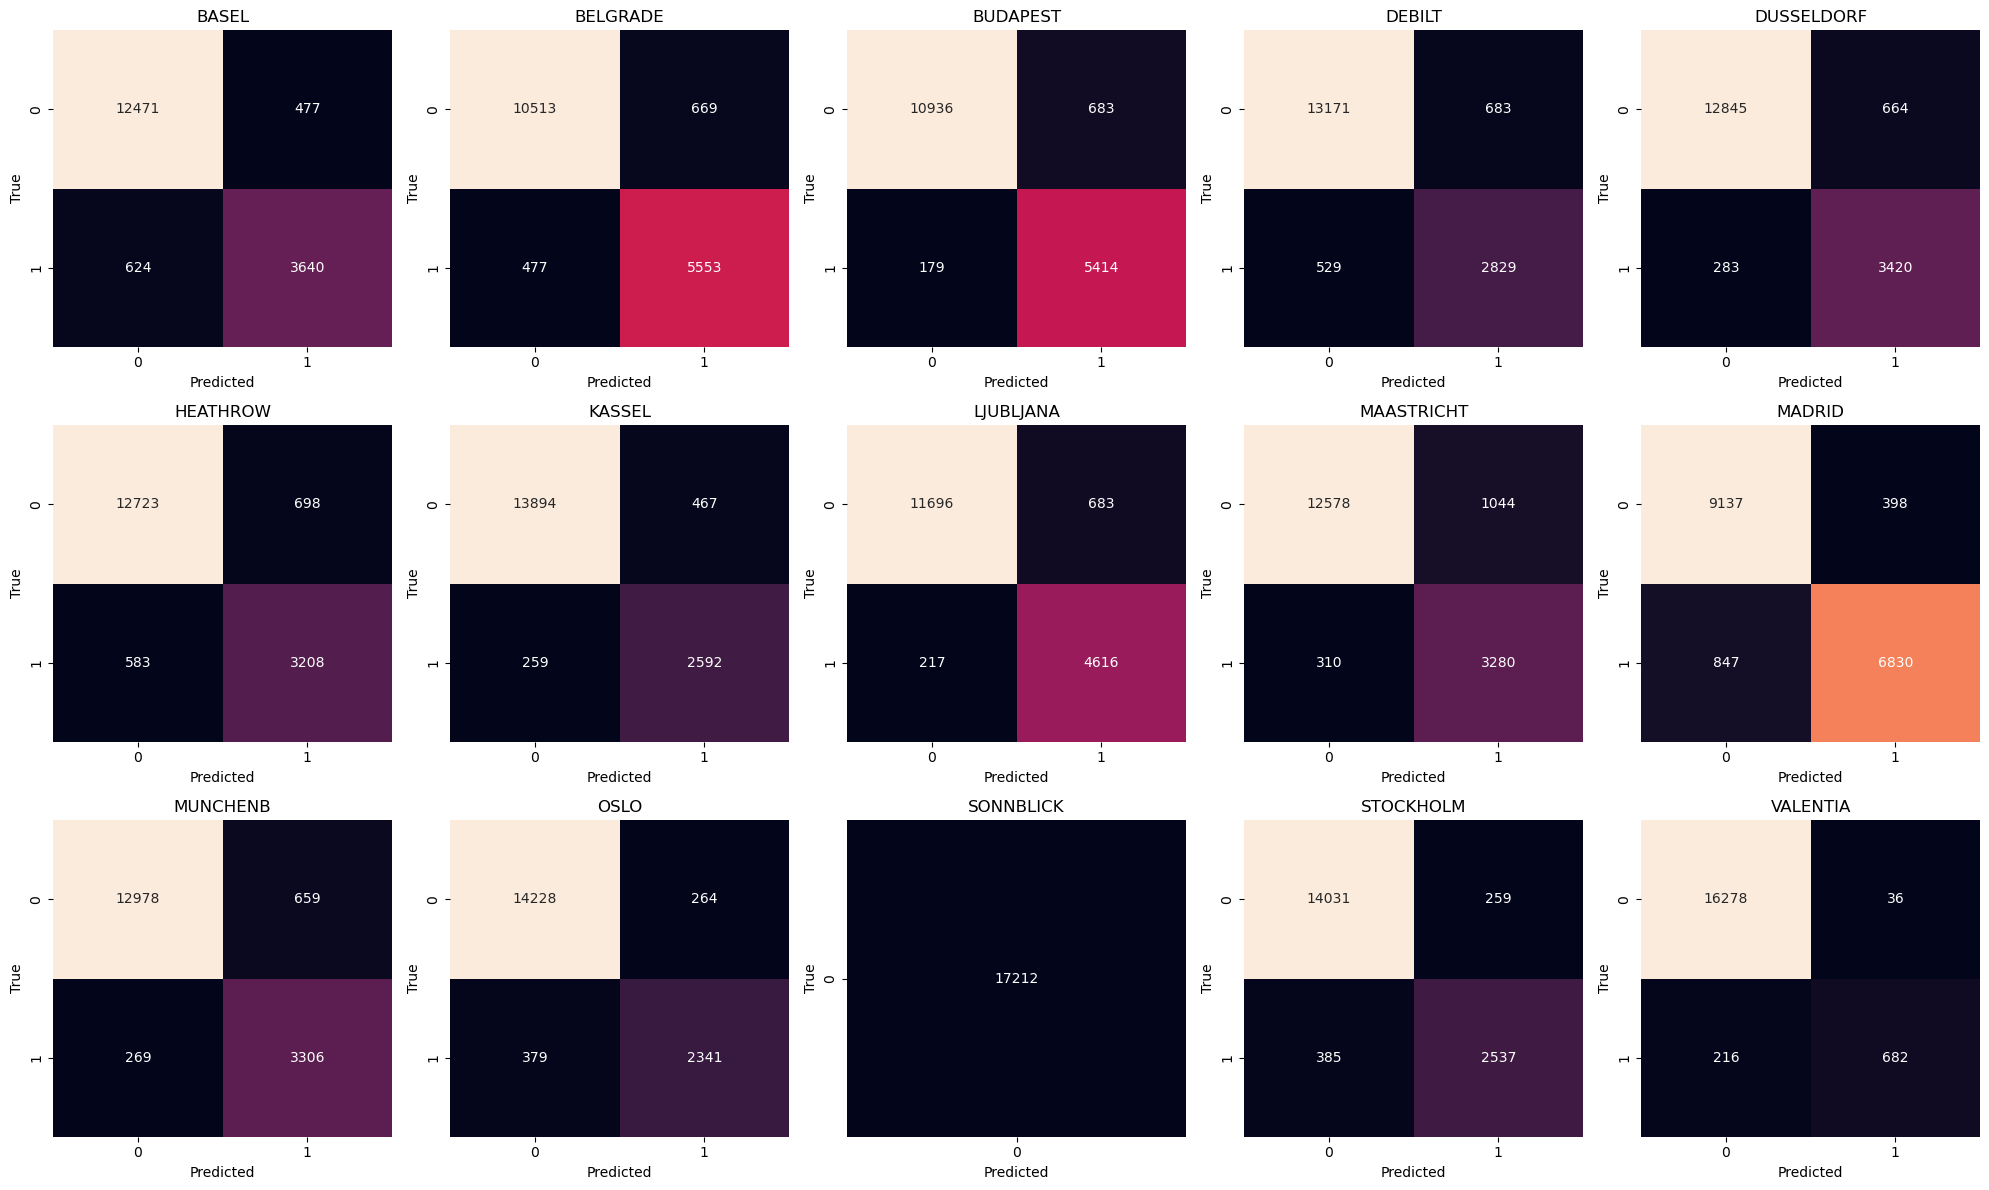

In [14]:
# Get city names (remove '_pleasant_weather' suffix)
city_names = [col.replace('_pleasant_weather', '') for col in df_answers.columns]

# Create subplots for all cities
fig, axes = plt.subplots(3, 5, figsize=(20, 12))  # 3 rows, 5 columns for 15 cities
axes = axes.flatten()

for i, city in enumerate(city_names):
    # Create confusion matrix for this city
    cm = confusion_matrix(y_train.iloc[:, i], y_pred[:, i])
    
    # Plot heatmap
    sns.heatmap(cm, annot=True, fmt='g', ax=axes[i], cbar=False)
    axes[i].set_title(f'{city}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')

plt.tight_layout()
plt.show()